# TP1b - Génération de variables aléatoires (Deuxième partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on continue de s'intéresser à la génération de variables aléatoires. Ce TP se concentre sur la méthode acceptation-rejet, l'estimation de Monte Carlo, et l'échantillonnage d'importance.

### Instructions

1. Renommer votre notebook sous la forme `tp1b_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 03 décembre 2023, 23h59.

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

## Partie 1 - Acceptation-Rejet (*Rejection sampling*)


NB : Toujours comparer les distributions empiriques obtenues aux densités théoriques à l'aide d'histogrammes ou de *kernel density estimates*.

**Q1 - Loi Bêta**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expiquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = 0.5, \beta = 0.5$ ?

> La loi beta est très complexe,elle utilise la fonction gamma elle même complexe est défini avec une intégrale,la méthode de la fonction inverse semble alors difficile à utiliser.
> On peut utiliser la loi uniforme sur [0,1] avec M=1.

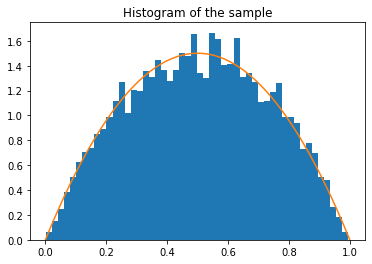

ratio accepté:  0.6639665360865812


In [38]:
alpha=2
beta=2
N=10000
n=0
i=0
m=1.5 # max de la fonction de densité, trouvée à la main
#sample  N points from the uniform distribution
#do reject sampling to get N points from the beta distribution
X=np.zeros(N)
while n<N:
    i=i+1
    U=np.random.uniform(0,1)
    x=np.random.uniform(0,m)
    if x<=stats.beta.pdf(U,alpha,beta):
        X[n]=U
        n+=1
            
#plot the histogram of the sample
plt.hist(X,bins=50,density=True)
plt.plot(np.linspace(0,1,100),stats.beta.pdf(np.linspace(0,1,100),alpha,beta))
plt.title("Histogram of the sample")
plt.show()

print('ratio accepté: ',N/i)


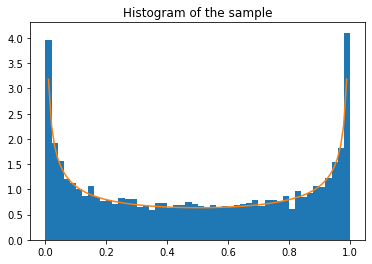

ratio accepté:  0.09800846793162929


In [39]:
alpha=1/2
beta=1/2
N=10000
n=0
i=0
m=10 #np.max(stats.beta.pdf(np.linspace(0,1,100),alpha,beta)), ce qu'on devrait vriament mettre mais cause logiquement une erreur
#sample  N points from the uniform distribution
#do reject sampling to get N points from the beta distribution
X=np.zeros(N)
while n<N:
    i=i+1
    U=np.random.uniform(0,1)
    x=np.random.uniform(0,m)
    if x<=stats.beta.pdf(U,alpha,beta):
        X[n]=U
        n+=1
            
#plot the histogram of the sample
plt.hist(X,bins=50,density=True)
plt.plot(np.linspace(0,1,100),stats.beta.pdf(np.linspace(0,1,100),alpha,beta))
plt.title("Histogram of the sample")
plt.show()

print('ratio accepté: ',N/i)


> D'après le cours, la densité théorique vaut $\frac{Z}{M}$, ici on a donc $\frac{1}{1.5}=\frac{2}{3}$. On a trouvé $0.66$ ce qui correspond bien.
>
> Pour $\alpha = \frac{1}{2}$ et $\beta = \frac{1}{2}$, la densité tend vers l'infini, on doit trouver un majorant $M$, ce qui est alors impossible.

**Q2 - Loi Gamma**. On considère la loi Gamma, dont la densité sur $\mathbb{R}_+$ est définie par
$$f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} exp(-\beta x) x^{\alpha - 1}.$$

Nous avons déjà vu en TD que si $X_1, ..., X_n$ sont des v.a. indépendantes de loi Exponentielle de paramètre $\beta$, alors $Y = \sum_{i=1}^n X_i$ suit une loi Gamma de paramètres $(n,\beta)$. Ceci nous permet de simuler de la loi Gamma quand $\alpha$ est entier, mais pas lorsque $\alpha$ n'est pas entier.

Dans ce cas, on va utiliser une loi Gamma $(\lfloor \alpha \rfloor, \beta - 1)$ comme loi instrumentale :
* Obtenir la formule de la valeur optimale de la constante *M*, puis la calculer numériquement
* Implémenter un algorithme acceptation-rejet pour générer 10000 échantillons de la loi Gamma avec les paramètres $\alpha = 2.5$ et $\beta = 1.5$.

> On ecrit d'abord le ratio de la densité sur la proposal, puis on trouve le maximum.
>
> On trouve pour le ratio: $\beta^\alpha*T(\lfloor \alpha \rfloor)/((\beta-1)^\lfloor \alpha \rfloor /T(\alpha))* exp(-x)* x^(\alpha-\lfloor \alpha \rfloor)$
>
> On trouve la dérivée: $K*exp(-x)*x^(\alpha-\lfloor \alpha \rfloor-1)*(\alpha-\lfloor \alpha \rfloor-x)$
>
> -> $x_m=\alpha-\lfloor \alpha \rfloor$
>
> -> $M=\beta^\alpha * T(\lfloor \alpha \rfloor)/((\beta-1)^\lfloor \alpha \rfloor /T(\alpha)) * exp(-x_m) * x_m^(\alpha-\lfloor \alpha \rfloor)$

3.556228846580734


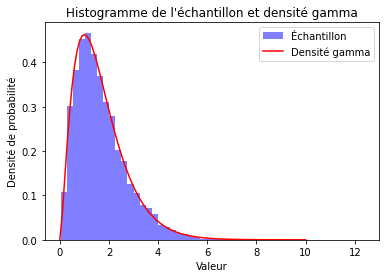

Ratio accepté : 0.28060723405449395


In [40]:
import math

alpha = 2.5
beta = 1.5
N = 10000
n = 0
i = 0
m = beta**alpha * math.gamma(np.floor(alpha))/((beta-1)**(np.floor(alpha))*math.gamma(alpha))*np.exp(np.floor(alpha)-alpha)*(alpha-np.floor(alpha))**(alpha-np.floor(alpha))
print(m)

X = np.zeros(N)
while n < N:
    i += 1
    # Obtenir U à partir de la distribution gamma tronquée
    U = np.random.gamma(int(alpha), scale=1/(beta-1))
    x = np.random.uniform(0, m * stats.gamma.pdf(U, int(alpha), scale=1/(beta-1)))
    if x <= stats.gamma.pdf(U, alpha, scale=1/beta):
        X[n] = U
        n += 1

# Tracer l'histogramme de l'échantillon
plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Échantillon')

# Tracer la densité de la distribution gamma
x_values = np.linspace(0, 10, 100)
plt.plot(x_values, stats.gamma.pdf(x_values, alpha, scale=1/beta), 'r-', label='Densité gamma')

plt.title("Histogramme de l'échantillon et densité gamma")
plt.xlabel("Valeur")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

print('Ratio accepté :', N/i)


La densité obtenue correspond assez bien à celle attendue.

**Q3 - Gaussienne tronquée**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser $\texttt{scipy.stats.cdf}$.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

On peut prendre la loi normale non tronquée comme loi instrumentale, car elle est simple à générer et le rapport de la gaussienne tronquée sur la gaussienne de base donnera simplement 1/'un facteur de normalisation de la gaussienne tronquée'.
Ce facteur vaut $P(-1<x<2)$ pour une gaussienne normale de dimension 1. Notons cette proba $p_a$.
On a alors la probabilité d'acceptation qui vaut $p_a^d$ pour la dimension d.

probabilité que X appartienne à [-1,2] :  0.8185946141203637


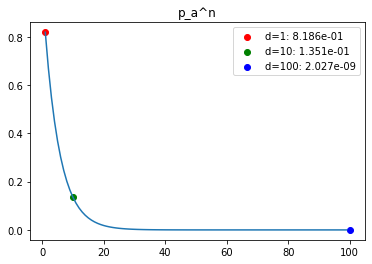

In [41]:
#use cdf to compute the probability that X belongs to [-1,2] for normal distribution
p_a= stats.norm.cdf(2)-stats.norm.cdf(-1)
print('probabilité que X appartienne à [-1,2] : ',p_a)
plt.plot(range(1,100),p_a**range(1,100))
plt.title("p_a^n")
#add point with label for d=1,10,100
plt.scatter(1, p_a**1, label='d=1: {:.3e}'.format(p_a**1), color='red')
plt.scatter(10, p_a**10, label='d=10: {:.3e}'.format(p_a**10), color='green')
plt.scatter(100, p_a**100, label='d=100: {:.3e}'.format(p_a**100), color='blue')
plt.legend()
plt.show()

Comme on peut le voir ici, la proba d'acceptation pour une loi normale tronquée en dimension d diminue exponentiellement en d. L aproba d'acceptation diminue rapidement, on aura beaucoup de mal à échantilloner des points de la loi.

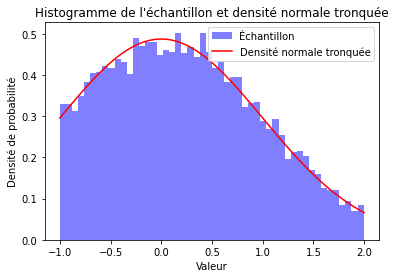

Ratio accepté : 0.6695232994108195


In [42]:

N = 10000
n = 0
i = 0
m = 1 / p_a

X = np.zeros(N)
while n < N:
    i += 1
    # Obtenir U à partir de la distribution normale tronquée à [-1, 2]
    U = stats.truncnorm.rvs(-1, 2, loc=0, scale=1)
    x = np.random.uniform(0, m * stats.truncnorm.pdf(U, -1, 2, loc=0, scale=1))
    if x <= stats.norm.pdf(U):  # Use stats.norm.pdf instead of np.random.normal
        X[n] = U
        n += 1

# Tracer l'histogramme de l'échantillon
plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Échantillon')

# Tracer la densité de la distribution normale tronquée
x_values = np.linspace(-1, 2, 100)
plt.plot(x_values, stats.truncnorm.pdf(x_values, -1, 2, loc=0, scale=1), 'r-', label='Densité normale tronquée')

plt.title("Histogramme de l'échantillon et densité normale tronquée")
plt.xlabel("Valeur")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

print('Ratio accepté :', N/i)


On peut voir ici qu'en dimension 1 l'approche fonctionne bien.

## Partie 2 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'estimateur de Monte Carlo de $\pi$.
* Représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en fonction du nombre d'échantillons (aller jusqu'à 10000). Quel résultat mathématique fondamental est-on en train d'illustrer ?
* (Bonus) - Faire 100 simulations de l'estimation par Monte Carlo de $\pi$ avec $N = 1000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur MC donné par le TCL.

In [43]:
import plotly.graph_objects as go
def estimate_pi_monte_carlo(num_samples):
    x = np.random.uniform(-1, 1, num_samples)
    y = np.random.uniform(-1, 1, num_samples)

    # Calcul du nombre de points à l'intérieur du cercle
    inside_circle = (x**2 + y**2) <= 1
    nb_inside_circle = np.sum(inside_circle)

    # Estimation de pi en calculant 4 fois le ratio entre les points à l'intérieur du cercle et le nb de points total 
    pi_estimate = 4 * nb_inside_circle / num_samples
    return pi_estimate

# Évolution de l'estimation de pi en fonction du nombre d'échantillons
num_samples_list = range(1, 10001)
pi_estimates = [estimate_pi_monte_carlo(n) for n in num_samples_list]

# Calcul de l'erreur absolue dans l'estimation de pi pour chaque taille d'échantillon
pi_errors = np.abs(np.array(pi_estimates) - np.pi)

# Graphique pour l'estimation de π
fig_pi = go.Figure()
fig_pi.add_trace(go.Scatter(x=list(num_samples_list), y=pi_estimates, mode='lines', name='Estimation de π'))
fig_pi.add_hline(y=np.pi, line_dash="dash", line_color="red", annotation_text="π réel", annotation_position="bottom right")
fig_pi.update_layout(
    title="Estimation de π en Fonction du Nombre d'Échantillons",
    xaxis_title="Nombre d'échantillons",
    yaxis_title="Estimation de π"
)
fig_pi.show()

# Graphique pour l'erreur dans l'estimation de π
fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x=list(num_samples_list), y=pi_errors, mode='lines', name='Erreur Absolue'))
fig_error.update_layout(
    title="Erreur Absolue dans l'Estimation de π",
    xaxis_title="Nombre d'échantillons",
    yaxis_title="Erreur Absolue"
)
fig_error.show()

>Cette approche illustre la loi des grands nombres, qui stipule que la moyenne d'une série d'observations tirées aléatoirement d'une distribution converge vers la moyenne théorique (ou attendue) de cette distribution à mesure que le nombre d'observations augmente. En d'autres termes, plus on effectue d'échantillonnages, plus la moyenne de ces échantillons se rapproche de l'espérance mathématique de la population totale.

In [44]:
from scipy.stats import norm
# Bonus : 100 simulations avec 1 000 échantillons
def create_plot(num_simulations=100,num_echantillons=1000):
    pi_estimates_1000_samples = [estimate_pi_monte_carlo(num_echantillons) for _ in range(num_simulations)]

    # Calcul de la moyenne et de la variance des résultats
    mean_estimate = np.mean(pi_estimates_1000_samples)
    variance_estimate = np.var(pi_estimates_1000_samples)

    # Calcul de la densité de la distribution normale pour la superposition sur le graphique
    normal_distribution = norm.pdf(sorted(pi_estimates_1000_samples), mean_estimate, np.sqrt(variance_estimate))

    # Graphique
    fig = go.Figure()

    # Histogramme des estimations de pi
    if num_simulations == 100 : 
        fig.add_trace(go.Histogram(x=pi_estimates_1000_samples, nbinsx=40, opacity=1,  name='Histogramme des Estimations'))
    else :
        fig.add_trace(go.Histogram(x=pi_estimates_1000_samples, nbinsx=40, opacity=1, histnorm='probability density',  name='Histogramme des Estimations'))

    # Valeur réelle de pi
    fig.add_trace(go.Scatter(x=[np.pi, np.pi], y=[0, max(normal_distribution)], mode='lines', line=dict(color='red', dash='dash'), name='Valeur Réelle de π'))

    # Courbe de la distribution normale (TCL)
    fig.add_trace(go.Scatter(x=sorted(pi_estimates_1000_samples), y=normal_distribution, mode='lines',line=dict(color='red'), name='Distribution Normale (TCL)'))

    # Ajout de la moyenne et de la variance dans le graphique
    fig.add_annotation(
        x=mean_estimate,
        y=max(normal_distribution),
        text=f"Moyenne: {mean_estimate:.3f}, Variance: {variance_estimate:.3f}",
        showarrow=True,
        arrowwidth=3,
        arrowhead=3,
        arrowcolor="black",
        font_size=12
    )
    fig.update_layout(
        title='Distribution des estimations de Pi (100 simulations avec 1000 échantillons)',
        xaxis_title='Estimation de π',
        yaxis_title='Fréquence',
        bargap=0.15
    )
    fig.show()

In [45]:
def create_pi_estimation_graph(num_simulations, num_samples):
    pi_estimates = [estimate_pi_monte_carlo(num_samples) for _ in range(num_simulations)]
    mean_estimate = np.mean(pi_estimates)
    variance_estimate = np.var(pi_estimates)
    normal_distribution = norm.pdf(sorted(pi_estimates), mean_estimate, np.sqrt(variance_estimate))

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=pi_estimates, nbinsx=40, opacity=1, name='Histogramme des Estimations', histnorm='probability density'))
    fig.add_trace(go.Scatter(x=[np.pi, np.pi], y=[0, max(normal_distribution)], mode='lines', line=dict(color='red', dash='dash'), name='Valeur Réelle de π'))
    fig.add_trace(go.Scatter(x=sorted(pi_estimates), y=normal_distribution, mode='lines', line=dict(color='red'), name='Distribution Normale (TCL)'))
    fig.update_layout(
        title=f'Distribution des estimations de Pi ({num_simulations} simulations avec {num_samples} échantillons)',
        xaxis_title='Estimation de π',
        yaxis_title='Densité de probabilité',
        bargap=0.15
    )
    fig.add_annotation(
        x=mean_estimate,
        y=max(normal_distribution),
        text=f"Moyenne: {mean_estimate:.4f}, Variance: {variance_estimate:.4f}",
        showarrow=True,
        arrowwidth=3,
        arrowhead=3,
        arrowcolor="black",
        font_size=12
    )
    return fig

fig_100 = create_pi_estimation_graph(100, 1000)
fig_100.show()

fig_10000 = create_pi_estimation_graph(10000, 1000)
fig_10000.show()

> On remarque bien une pseudo-correspondance entre l'histogramme des estimations et la courbe normale, d'autant plus marquant avec 10 000 simulations, ce qui indique que l'estimateur Monte Carlo converge en loi vers une distribution normale conformément au TCL.
>
> De plus, la variance est très faible, ce qui montre que la dispersion des estimations diminue avec l'augmentation du nombre d'échantillons


## Partie 3 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard"
* Simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Pouvait-on s'attendre à ce résultat ?

$\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(0,1)$ se réécrit: $ \int_{3}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx $     

ou encore   $ \int_{-\infty}^{+\infty} h(x)p(x) dx $ avec $  p(x)=\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$ et $h(x)=\chi_{\{X > 3\}}(x) .$

>L'estimateur classique de Monte - Carlo est alors:

$\hat{I}_{MC} = \frac{1}{N_s} \sum_{i=1}^{N_s} h(x^{(i)})= \frac{1}{N_s} \sum_{i=1}^{N_s} \chi_{\{X > 3\}}(x^{(i)})$

In [46]:
N=10000
n=100
def estimate_p_3(num_samples):
    x=np.random.normal(0,1,num_samples)
    p_3=np.sum(x>3)/num_samples
    return p_3

estimates=[estimate_p_3(N) for _ in range(n)]
mean_estimate=np.mean(estimates)
variance_estimate=np.var(estimates)
reel_value=1-norm.cdf(3)
normal_distribution=norm.pdf(sorted(estimates),mean_estimate,np.sqrt(variance_estimate))
normal_distribution=normal_distribution/max(normal_distribution)*max(np.histogram(estimates,bins=40)[0])
fig=go.Figure()
fig.add_trace(go.Histogram(x=estimates,nbinsx=40,opacity=1,name='Histogramme des Estimations'))
fig.add_trace(go.Scatter(x=[reel_value,reel_value],y=[0,max(normal_distribution)],mode='lines',line=dict(color='red',dash='dash'),name='Valeur Réelle de p_3'))
fig.add_trace(go.Scatter(x=sorted(estimates),y=normal_distribution,mode='lines',line=dict(color='red'),name='Distribution Normale (TCL)'))
fig.add_annotation(
    x=reel_value,
    y=max(normal_distribution),
    text=f"Moyenne: {mean_estimate:.3e}, Variance: {variance_estimate:.3e}",
    showarrow=True,
    arrowwidth=3,
    arrowhead=3,
    arrowcolor="black",
    font_size=12
)
fig.update_layout(
    title='Distribution des estimations de p_3 (100 simulations avec 10000 échantillons)',
    xaxis_title='Estimation de p_3',
    yaxis_title='Fréquence',
    bargap=0.15
)
fig.show()
print('Estimation de p_3 : {:.3e}'.format(mean_estimate))
print('Variance de l\'estimation de p_3 : {:.3e}'.format(variance_estimate))
var1=variance_estimate

Estimation de p_3 : 1.359e-03
Variance de l'estimation de p_3 : 1.398e-07


$\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(4,1)$ se réécrit: $ \int_{3}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx $     

ou encore   $ \int_{-\infty}^{+\infty} h(x)p(x) dx $ avec $  p(x)=\frac{1}{\sqrt{2\pi}} e^{-\frac{(x-4)^2}{2}}$ et $h(x)=\chi_{\{X > 3\}}(x) e^{(-4x+8)} .$

>L'estimateur classique de Monte - Carlo est alors:

$\hat{I}_{MC} = \frac{1}{N_s} \sum_{i=1}^{N_s} h(x^{(i)})= \frac{1}{N_s} \sum_{i=1}^{N_s} \chi_{\{X > 3\}}(x^{(i)}) e^{(-4x^{(i)}+8)}$

In [47]:
N=10000
n=1000
def estimate_p_3_bis(num_samples):
    x=np.random.normal(4,1,num_samples)
    y=[np.exp(-4*i+8) if i>3 else 0 for i in x]
    return np.mean(y)

estimates=[estimate_p_3_bis(N) for _ in range(n)]
mean_estimate=np.mean(estimates)
variance_estimate=np.var(estimates)
reel_value=1-norm.cdf(3)
normal_distribution=norm.pdf(sorted(estimates),mean_estimate,np.sqrt(variance_estimate))
normal_distribution=normal_distribution/max(normal_distribution)*max(np.histogram(estimates,bins=40)[0])
fig=go.Figure()
fig.add_trace(go.Histogram(x=estimates,nbinsx=40,opacity=1,name='Histogramme des Estimations'))
fig.add_trace(go.Scatter(x=[reel_value,reel_value],y=[0,max(normal_distribution)],mode='lines',line=dict(color='red',dash='dash'),name='Valeur Réelle de p_3'))
fig.add_trace(go.Scatter(x=sorted(estimates),y=normal_distribution,mode='lines',line=dict(color='red'),name='Distribution Normale (TCL)'))
fig.add_annotation(
    x=reel_value,
    y=max(normal_distribution),
    text=f"Moyenne: {mean_estimate:.3e}, Variance: {variance_estimate:.3e}",
    showarrow=True,
    arrowwidth=3,
    arrowhead=3,
    arrowcolor="black",
    font_size=12
)
fig.update_layout(
    title='Distribution des estimations de p_3 (100 simulations avec 10000 échantillons)',
    xaxis_title='Estimation de p_3',
    yaxis_title='Fréquence',
    bargap=0.15
)
fig.show()
print('Estimation de p_3 : {:.3e}'.format(mean_estimate))
print('Variance de l\'estimation de p_3 : {:.3e}'.format(variance_estimate))
var2=variance_estimate

Estimation de p_3 : 1.348e-03
Variance de l'estimation de p_3 : 9.042e-10


In [48]:
d=var1-var2
print('var1 : {:.3e}'.format(var1))
print('var2 : {:.3e}'.format(var2))
      
print('d : {:.3e}'.format(d))
print('d/var1 : {:.3%}'.format(d/var1))
print('d/var2 : {:.3%}'.format(d/var2))

var1 : 1.398e-07
var2 : 9.042e-10
d : 1.389e-07
d/var1 : 99.353%
d/var2 : 15362.461%


> Oui, en utilisant une loi instrumentale N(4,1), on cible mieux la queue de la distribution là où l'événement 
P(X>3) est plus probable. Cela augmente la fréquence d'échantillonnage des valeurs significatives pour l'estimation.
> C'est un bon choix dans ce cas car elle est centrée plus près de la région où X>3, augmentant ainsi la probabilité d'observer des échantillons dans cette zone critique, par rapport à la distribution normale standard. Donc la variance diminue comme on peut le contester.

In [49]:
fig = go.Figure(
    data=[
        go.Bar(x=['var1', 'var2'], 
               y=[var1, var2], 
               marker_color=['blue', 'green'])
    ],
    layout={
        'yaxis': {'type': 'log', 'title': 'Variance (échelle logarithmique)'},
        'title': 'Comparaison de la Variance des Estimateurs de Monte Carlo'
    }
)

fig.show()
